In [2]:
import os
import pandas as pd


In [28]:
df=pd.read_csv("./Sales_Data/Sales_April_2019.csv")
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


In [32]:
all_months_data=pd.DataFrame()
files=[file for file in os.listdir('./Sales_Data')]
for file in files:
    df=pd.read_csv("./Sales_Data/"+file)
    all_months_data=pd.concat([all_months_data,df])
all_months_data.to_csv('all_data.csv',index=False)
    


In [66]:
df=pd.read_csv('all_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### DROP ROWS WITH NaN

In [67]:
NaN=df[df.isna().any(axis=1)]
NaN.head()
df=df.dropna(how='all')
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### TO CONVERT INTO INT TYPE

In [79]:
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'])
df['Price Each']=pd.to_numeric(df['Price Each'])

#### ADD MONTH COLUMN

In [101]:
df=df[df['Order Date'].str[0:2]!='Or']

df["Month"]=df['Order Date'].str[0:2]
df['Month']=df['Month'].astype('int32')
#df


#### ADD SALES COLUMN

In [102]:

df['Sales']=df['Quantity Ordered']*df['Price Each']
#df

### BEST SALES IN 12 MONTHS

In [96]:
results=df.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


<function matplotlib.pyplot.show(*args, **kw)>

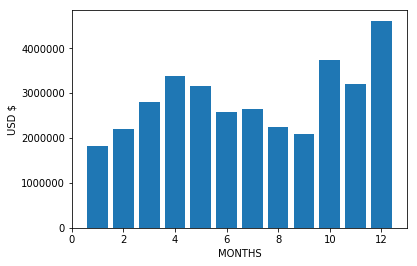

In [103]:
mport matplotlib.pyplot as plt
month=range(1,13)
plt.bar(month,results['Sales'])
plt.xlabel('MONTHS')
plt.ylabel('USD $')
plt.show

### WHICH CITY HAS HIGHEST NUMBER OF SALES

#### ADD A CITY COLUMN

In [113]:

def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [115]:
results=df.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


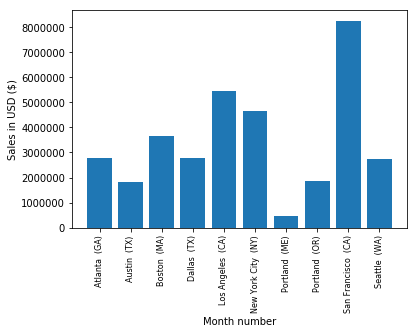

In [121]:

keys = [city for city, df in df.groupby(['City'])]

plt.bar(keys,df.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()